In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from k_means import KMeans

## 1. Prepare and visualize dataset

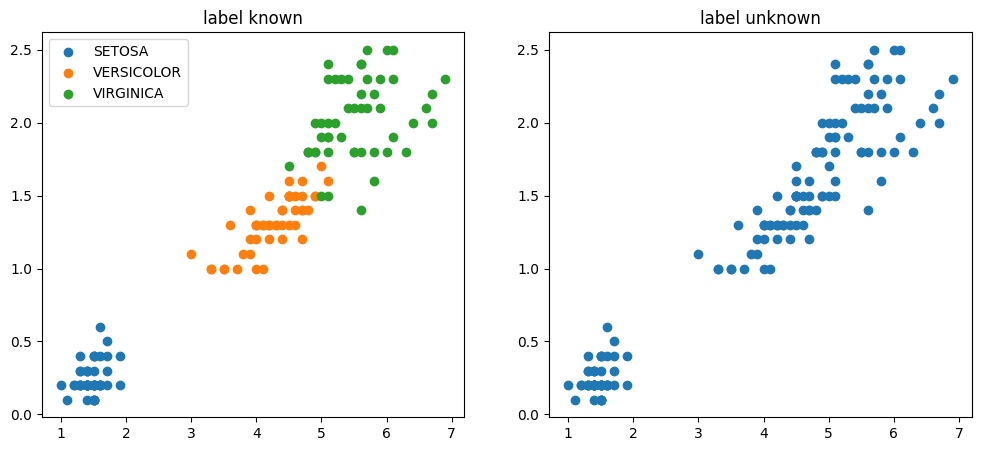

In [3]:
data = pd.read_csv('./data/iris.csv')
iris_types = ['SETOSA','VERSICOLOR','VIRGINICA']

x_axis = 'petal_length'
y_axis = 'petal_width'

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],
                data[y_axis][data['class']==iris_type],
                label=iris_type)
plt.title('label known')
plt.legend()
plt.subplot(1,2,2)
plt.scatter(data[x_axis][:],data[y_axis][:])
plt.title('label unknown')
plt.show()

## 2. Train the KMeans model

In [4]:
num_examples = data.shape[0]
x_train = data[[x_axis,y_axis]].values.reshape(num_examples,2)

num_clusters = 3
max_iteritions = 50

k_means = KMeans(x_train,num_clusters)
centroids,closest_centroids_ids = k_means.train(max_iteritions)

## 3. Visualize the results

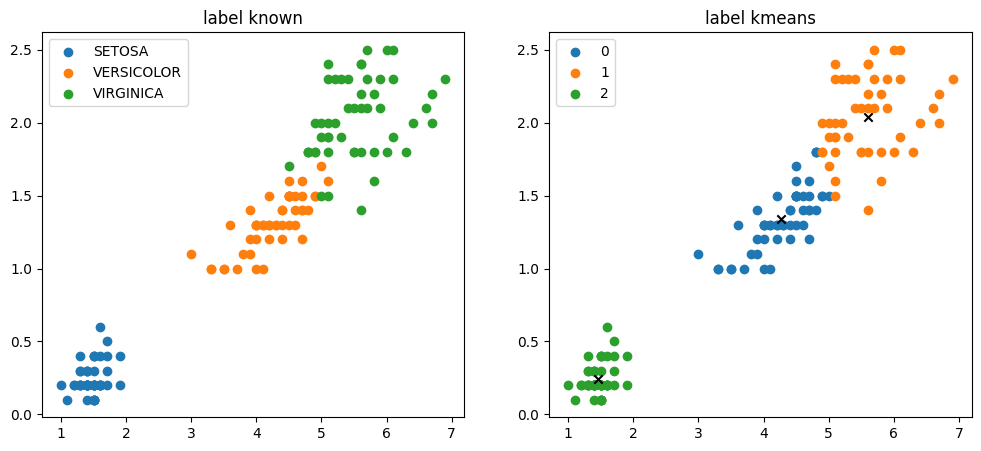

In [5]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
for iris_type in iris_types:
    plt.scatter(data[x_axis][data['class']==iris_type],data[y_axis][data['class']==iris_type],label = iris_type)
plt.title('label known')
plt.legend()

plt.subplot(1,2,2)
for centroid_id, centroid in enumerate(centroids):
    current_examples_index = (closest_centroids_ids == centroid_id).flatten()
    plt.scatter(data[x_axis][current_examples_index],data[y_axis][current_examples_index],label = centroid_id)

for centroid_id, centroid in enumerate(centroids):
    plt.scatter(centroid[0],centroid[1],c='black',marker = 'x')
plt.legend()    
plt.title('label kmeans')
plt.show()